In [188]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime 
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series 
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import adfuller # Augmented Dickey Fuller test for testing stationarity

from statsmodels.tsa.arima_model import ARIMA #for manual ARIMA

import pmdarima as pm #auto arima

The dataset we are using can be found at https://www.kaggle.com/datasets/arashnic/food-demand/code
We being the univariate analysis on a center-meal id combintation which has data for 145 weeks. In case there is missing data we will impute it.

In [189]:
#reading in the data from the food demand dataset
train=pd.read_csv("foodDemand_train/train.csv")
centers=pd.read_csv("foodDemand_train/fulfilment_center_info.csv")
meals=pd.read_csv("foodDemand_train/meal_info.csv")
test=pd.read_csv("food_Demand_test.csv")

In [190]:
train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [244]:
temp_train=train[(train["meal_id"]==1885)&(train["center_id"]==55)]
temp_train.set_index('week',inplace=True)
temp_train=temp_train["num_orders"].to_frame()
temp_train

,num_orders
week,
1,177
2,323
3,96
4,163
5,215
...,...
141,107
142,121
143,176


In [228]:
#imputing null values if they exist
temp_train = temp_train.reindex(range(1, 146), fill_value= np.NaN)
if temp_train["num_orders"].isnull().values.any():
    print("hello")
    temp_train["num_orders"]=temp_train["num_orders"].fillna(temp_train['num_orders'].median())

In [192]:
#splitting the data into training and testing sets
train_data, test_data = train_test_split(temp_train, test_size=0.11, random_state=25, shuffle = False)

In [193]:
train_data

,num_orders
week,
1,177
2,323
3,96
4,163
5,215
...,...
125,109
126,94
127,231


In [194]:
test_data

,num_orders
week,
130,95
131,162
132,162
133,122
134,82
135,216
136,134
137,96
138,81


Running various ETS forecasting models

In [195]:
ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(len(test_data)+1).rename('alpha=0.2')

#Second Instance
ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.8,optimized=False)
ins_cast2 = ins2.forecast(len(test_data)+1).rename('alpha=0.5')

#Third Instance
ins3 = SimpleExpSmoothing(train_data).fit()
ins_cast3 = ins3.forecast(len(test_data)+1).rename('alpha=%s'%ins3.model.params['smoothing_level'])

double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()

double_ets_add_pred = double_ets_add.forecast(len(test_data)+1)
double_ets_mul_pred = double_ets_mul.forecast(len(test_data)+1)

# triple ETS - Holt Winter's Seasonal Method
triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=52).fit()
triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=52).fit()

triple_ets_add_pred = triple_ets_add.forecast(len(test_data)+1)
triple_ets_mul_pred = triple_ets_mul.forecast(len(test_data)+1)


ins_cast1.drop(ins_cast1.index[0],inplace=True)
ins_cast2.drop(ins_cast2.index[0],inplace=True)
ins_cast3.drop(ins_cast3.index[0],inplace=True)
double_ets_add_pred.drop(double_ets_add_pred.index[0],inplace=True)
double_ets_mul_pred.drop(double_ets_mul_pred.index[0],inplace=True)
triple_ets_add_pred.drop(triple_ets_add_pred.index[0],inplace=True)
triple_ets_mul_pred.drop(triple_ets_mul_pred.index[0],inplace=True)

C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471:

In [196]:
double_ets_mul_pred

130    125.976946
131    125.232519
132    124.492491
133    123.756836
134    123.025528
135    122.298541
136    121.575851
137    120.857431
138    120.143256
139    119.433301
140    118.727542
141    118.025953
142    117.328511
143    116.635189
144    115.945965
145    115.260813
dtype: float64

Running both non-seasonal and seasonal ARIMA models

In [197]:
non_seasonal_auto_model = pm.auto_arima(train_data, start_p=0, start_q=0, 
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=52,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)

print(non_seasonal_auto_model.summary())

C:\Users\Parth Choksi\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (52) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1607.372, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1574.372, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1539.918, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1605.375, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1541.164, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1540.781, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1543.478, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1538.010, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1539.256, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1538.872, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1572.402, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1540.042, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.527 seconds
                               SARIMAX Results                                
Dep. Vari

In [198]:
# Forecast
n_periods = len(test_data)+1
fc_auto_nonseasonal, confint = non_seasonal_auto_model.predict(n_periods=n_periods, return_conf_int=True)
fc_auto_nonseasonal

17


C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


129    130.87531
130    130.87531
131    130.87531
132    130.87531
133    130.87531
134    130.87531
135    130.87531
136    130.87531
137    130.87531
138    130.87531
139    130.87531
140    130.87531
141    130.87531
142    130.87531
143    130.87531
144    130.87531
145    130.87531
dtype: float64

In [199]:
fc_auto_nonseasonal.drop(fc_auto_nonseasonal.index[0],inplace=True)
confint = np.delete(confint, 0, axis=0)

In [200]:
train_data

,num_orders
week,
1,177
2,323
3,96
4,163
5,215
...,...
125,109
126,94
127,231


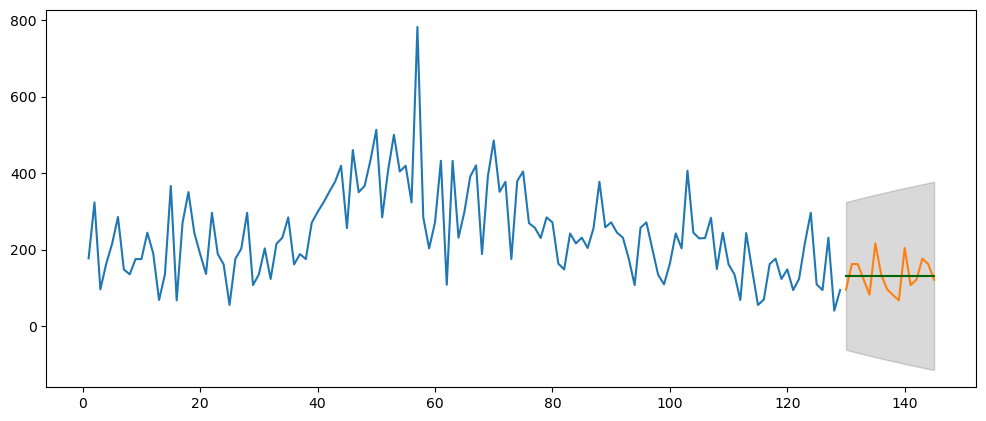

In [202]:
# make series for plotting purpose
#fc_series_auto_nonseasonal = pd.Series(fc_auto_nonseasonal, index=test_data.index)
lower_series = pd.Series(confint[:, 0], index=test_data.index)
upper_series = pd.Series(confint[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='train')
plt.plot(test_data, label='test')
plt.plot(fc_auto_nonseasonal, color='darkgreen', label='forecast')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.show()

In [204]:
fc_auto_nonseasonal

130    130.87531
131    130.87531
132    130.87531
133    130.87531
134    130.87531
135    130.87531
136    130.87531
137    130.87531
138    130.87531
139    130.87531
140    130.87531
141    130.87531
142    130.87531
143    130.87531
144    130.87531
145    130.87531
dtype: float64

In [205]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(train_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[52]             : AIC=inf, Time=3.92 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1006.727, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=973.804, Time=1.26 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=2.35 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=981.531, Time=0.22 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=inf, Time=14.57 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=6.06 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=4.46 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=977.059, Time=21.06 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=997.371, Time=1.66 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=965.228, Time=2.77 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=973.236, Time=0.31 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=22.52 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=8.89 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=6.22

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  129
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 52)   Log Likelihood                -471.699
Date:                            Sun, 11 Dec 2022   AIC                            953.397
Time:                                    21:46:25   BIC                            965.051
Sample:                                         0   HQIC                           958.054
                                            - 129                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8856      0.100     -8.820      0.000      -1.082      -0.689
ar.L2         -0.6589      0.134     -4.922      0.000      -0.921      -0.397
ar.L3         -0.4192      0.114     -3.682      0.000      -0.642      -0.196
ar.S.L52      -0.5653      0.184     -3.074      0.002      -0.926      -0.205
sigma2      1.105e+04   3472.131      3.182      0.001    4242.776    1.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.35
Prob(Q):                              0.89   Prob(JB):                         0.19
Heteroskedasticity (H):               0.99   Skew:                             0.48
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [212]:
# Forecast
n_periods = len(test_data)+1
fc_auto_seasonal, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [213]:
fc_auto_seasonal.drop(fc_auto_seasonal.index[0],inplace=True)
confint = np.delete(confint, 0, axis=0)

In [214]:
print(fc_auto_seasonal)

130    147.174929
131    157.391057
132     38.445282
133     14.127786
134    115.872908
135     47.023266
136    115.772023
137    102.739293
138    162.891974
139    141.772661
140    108.350143
141    103.535838
142    148.009571
143    156.739908
144    147.895647
145    132.801580
dtype: float64


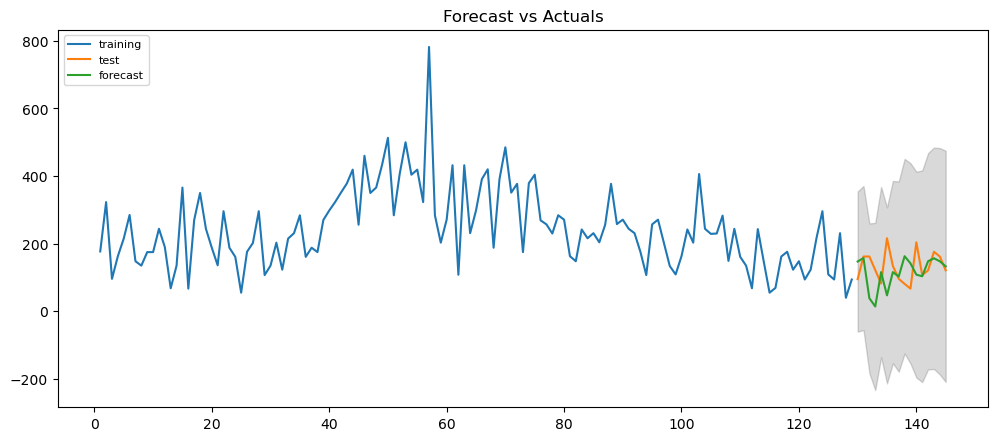

In [215]:
# make series for plotting purpose
fc_series_auto_seasonal = pd.Series(fc_auto_seasonal, index=test_data.index)
lower_series = pd.Series(confint[:, 0], index=test_data.index)
upper_series = pd.Series(confint[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='test')
plt.plot(fc_series_auto_seasonal, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [217]:
#define metrics dataframe which will be used below for 
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])

                                 
def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    
    df = pd.DataFrame({'Model': model,
                       'RMSE': rmse,
                       'MAE': mae, 
                       'MAPE': mape}, index=[0])
    dataframe = metrics_dataframe.append(df)
    return dataframe

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                fc_auto_nonseasonal.values.flatten(), 
                                'Auto ARIMA Non Seasonal')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                fc_auto_seasonal.values.flatten(), 
                                'Auto ARIMA Seasonal')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                    ins_cast1.values.flatten(), 
                                    'Simple 0.2')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast2.values.flatten(), 
                                'Simple 0.5')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                ins_cast3.values.flatten(), 
                                'Simple 1')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_add_pred.values.flatten(), 
                                'Double Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                double_ets_mul_pred.values.flatten(), 
                                'Double Mul')


metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_add_pred.values.flatten(), 
                                'Triple Add')

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                triple_ets_mul_pred.values.flatten(), 
                                'Triple Mul')

metrics_dataframe

,Model,RMSE,MAE,MAPE
0,Auto ARIMA Non Seasonal,43.192332,36.609414,31.086373
0,Auto ARIMA Seasonal,71.859523,52.748873,42.322970
0,Simple 0.2,43.183552,36.728977,31.404926
0,Simple 0.5,60.189774,46.861542,30.645432
0,Simple 1,43.184340,36.684584,31.286648
0,Double Add,45.685136,37.002552,28.682508
0,Double Mul,44.946225,36.357614,28.568551
0,Triple Add,81.900379,62.286290,45.120634
0,Triple Mul,58.719262,45.836186,34.100631


In [220]:
#grabbing the top 3 performing models
metrics_dataframe=metrics_dataframe.sort_values(by='RMSE')
metrics_dataframe[:3]

,Model,RMSE,MAE,MAPE
0,Simple 0.2,43.183552,36.728977,31.404926
0,Simple 1,43.184340,36.684584,31.286648
0,Auto ARIMA Non Seasonal,43.192332,36.609414,31.086373


In [222]:
#top 3 performing models
metrics_dataframe[:3]['Model']

0                 Simple 0.2
0                   Simple 1
0    Auto ARIMA Non Seasonal
Name: Model, dtype: object

In [225]:
# Create a data frame with all the predictions along with the test data
test_pred_df = test_data.copy()

#test_pred_df=test_pred_df.to_frame()

# Add all predictions 
test_pred_df = test_pred_df.assign(SimpleExp_1_pred = ins_cast1.values.flatten(),
                                   SimpleExp_3_pred = ins_cast3.values.flatten(),
                                   fc_auto_nonseasonal_pred = fc_auto_nonseasonal.values.flatten())


# Create an average prediction from the three and check it's metrics
test_pred_df['Average_Predictions'] = (test_pred_df['SimpleExp_1_pred']+test_pred_df['SimpleExp_3_pred']+test_pred_df['fc_auto_nonseasonal_pred'])/3

metrics_dataframe = metrics_cal(test_data.values.flatten(), 
                                test_pred_df['Average_Predictions'].values.flatten(), 
                                'Average')

In [226]:
metrics_dataframe

,Model,RMSE,MAE,MAPE
0,Simple 0.2,43.183552,36.728977,31.404926
0,Simple 1,43.184340,36.684584,31.286648
0,Auto ARIMA Non Seasonal,43.192332,36.609414,31.086373
0,Double Mul,44.946225,36.357614,28.568551
0,Double Add,45.685136,37.002552,28.682508
0,Triple Mul,58.719262,45.836186,34.100631
0,Simple 0.5,60.189774,46.861542,30.645432
0,Auto ARIMA Seasonal,71.859523,52.748873,42.322970
0,Triple Add,81.900379,62.286290,45.120634
0,Average,43.184937,36.674325,31.259316


Out of all the models we can see that Simple 0.2 performs the best

We will now proceed to create an api that will return a prediction upon receiving a center ids and product id as inputs

We have created a function called Univariate Forecasting that takes center-id and meal-id as input and gives the forecast from the best univariate model by RMSE as output. This can easily be converted to an API service that is deployed on a central server. When a user sends a request with the respective center id and meal id the service can respond with a list of forecasts. We can also resily record the metrics_dataframe and track the performance of the various models in every request that goes to the service. The metrics_dataframe alongwith model specific summaries can be logged using Prometheus which records real time metrics and visualized by the backend technical team using Grafana. This will help us track the live performance of the models and add optimizations wherever required.

In [271]:
metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])
    
def metrics_cal(actuals, predictions, model):
    mse = mean_squared_error(actuals, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(actuals, predictions)
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    x=[model,rmse,mae,mape]
    df = pd.DataFrame({'Model': model,
                       'RMSE': rmse,
                       'MAE': mae, 
                       'MAPE': mape}, index=[0])
    #dataframe = metrics_dataframe.append(df)
    return x

In [291]:
def univariate_forecasting(meal,center):
    
    print("Prepping data")
    temp_train=train[(train["meal_id"]==meal)&(train["center_id"]==center)]
    temp_test=test[(test["meal_id"]==meal)&(test["center_id"]==center)]
    temp_train.set_index('week',inplace=True)
    temp_train=temp_train["num_orders"]
    temp_train=temp_train.to_frame()
    temp_train = temp_train.reindex(range(1, 146), fill_value= np.NaN)
    if temp_train["num_orders"].isnull().values.any():
        print("hello")
        temp_train["num_orders"]=temp_train["num_orders"].fillna(temp_train['num_orders'].median())
        
    #temp_test.set_index('week',inplace=True)
    #temp_test=temp_train["num_orders"]
    train_data, test_data = train_test_split(temp_train, test_size=0.11, random_state=25, shuffle = False)
    #First Instance
    print("Running ETS Models")
    ins1 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.2,optimized=False)
    ins_cast1 = ins1.forecast(len(test_data)+1).rename('alpha=0.2')

    #Second Instance
    ins2 = SimpleExpSmoothing(train_data).fit(smoothing_level=0.8,optimized=False)
    ins_cast2 = ins2.forecast(len(test_data)+1).rename('alpha=0.5')

    #Third Instance
    ins3 = SimpleExpSmoothing(train_data).fit()
    ins_cast3 = ins3.forecast(len(test_data)+1).rename('alpha=%s'%ins3.model.params['smoothing_level'])

    double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
    double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()

    double_ets_add_pred = double_ets_add.forecast(len(test_data)+1)
    double_ets_mul_pred = double_ets_mul.forecast(len(test_data)+1)

    # triple ETS - Holt Winter's Seasonal Method
    triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=52).fit()
    triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=52).fit()

    triple_ets_add_pred = triple_ets_add.forecast(len(test_data)+1)
    triple_ets_mul_pred = triple_ets_mul.forecast(len(test_data)+1)
    
    ins_cast1.drop(ins_cast1.index[0],inplace=True)
    ins_cast2.drop(ins_cast2.index[0],inplace=True)
    ins_cast3.drop(ins_cast3.index[0],inplace=True)
    double_ets_add_pred.drop(double_ets_add_pred.index[0],inplace=True)
    double_ets_mul_pred.drop(double_ets_mul_pred.index[0],inplace=True)
    triple_ets_add_pred.drop(triple_ets_add_pred.index[0],inplace=True)
    triple_ets_mul_pred.drop(triple_ets_mul_pred.index[0],inplace=True)
    
    print(ins_cast1)
    print(ins_cast2)
    
    print("Running non seasonal arima")
    non_seasonal_auto_model = pm.auto_arima(train_data, start_p=0, start_q=0, 
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=52,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
    n_periods = len(test_data)+1

    fc_auto_nonseasonal, confint = non_seasonal_auto_model.predict(n_periods=n_periods, return_conf_int=True)
    
    fc_auto_nonseasonal.drop(fc_auto_nonseasonal.index[0],inplace=True)
    confint = np.delete(confint, 0, axis=0)
    
    print("running seasonal arima")
    smodel = pm.auto_arima(train_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
    
    n_periods = len(test_data)+1
    fc_auto_seasonal, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
    fc_auto_seasonal.drop(fc_auto_seasonal.index[0],inplace=True)
    confint = np.delete(confint, 0, axis=0)
    
    print("creating metrics data frame")
    metrics_dataframe = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'MAPE'])
    
    #get all the metrics
    
    #Simple 0.2
    k=metrics_cal(test_data.values.flatten(), 
                                    ins_cast1.values.flatten(), 
                                    'Simple 0.2')
    temp_series = pd.Series(k, index = metrics_dataframe.columns)
    metrics_dataframe = metrics_dataframe.append(temp_series,ignore_index = True)
    

    #Simple 0.5
    k=metrics_cal(test_data.values.flatten(), 
                                    ins_cast2.values.flatten(), 
                                    'Simple 0.5')
    temp_series = pd.Series(k, index = metrics_dataframe.columns)
    metrics_dataframe = metrics_dataframe.append(temp_series,ignore_index = True)
    
    #Simple 1

    k=metrics_cal(test_data.values.flatten(), ins_cast3.values.flatten(), 'Simple 1')
    temp_series = pd.Series(k, index = metrics_dataframe.columns)
    metrics_dataframe = metrics_dataframe.append(temp_series,ignore_index = True)
    

    #Double Add
    k=metrics_cal(test_data.values.flatten(), double_ets_add_pred.values.flatten(), 'Double Add')
    temp_series = pd.Series(k, index = metrics_dataframe.columns)
    metrics_dataframe = metrics_dataframe.append(temp_series,ignore_index = True)
    
    #Double Mul
    k=metrics_cal(test_data.values.flatten(), double_ets_mul_pred.values.flatten(),'Double Mul')
    temp_series = pd.Series(k, index = metrics_dataframe.columns)
    metrics_dataframe = metrics_dataframe.append(temp_series,ignore_index = True)

    #Triple Add
    k=metrics_cal(test_data.values.flatten(), triple_ets_add_pred.values.flatten(), 'Triple Add')
    temp_series = pd.Series(k, index = metrics_dataframe.columns)
    metrics_dataframe = metrics_dataframe.append(temp_series,ignore_index = True)

    #Triple Mul
    k=metrics_cal(test_data.values.flatten(), triple_ets_mul_pred.values.flatten(),'Triple Mul')
    temp_series = pd.Series(k, index = metrics_dataframe.columns)
    metrics_dataframe = metrics_dataframe.append(temp_series,ignore_index = True)
    
    #Auto Arima Non Seasonal
    k=metrics_cal(test_data.values.flatten(),fc_auto_nonseasonal.values.flatten(),'Auto ARIMA Non Seasonal')
    temp_series = pd.Series(k, index = metrics_dataframe.columns)
    metrics_dataframe = metrics_dataframe.append(temp_series,ignore_index = True)

    #Auto Arima Seasonal
    k=metrics_cal(test_data.values.flatten(), fc_auto_seasonal.values.flatten(), 'Auto ARIMA Seasonal')
    temp_series = pd.Series(k, index = metrics_dataframe.columns)
    metrics_dataframe = metrics_dataframe.append(temp_series,ignore_index = True)
    
    metrics_dataframe=metrics_dataframe.sort_values(by='RMSE')
    selection=metrics_dataframe['Model'].iloc[0]
    print(selection)
    print(metrics_dataframe)
    print("doing the actual forecasts")
    if selection=="Simple 0.2":
        ins1 = SimpleExpSmoothing(temp_train).fit(smoothing_level=0.2,optimized=False)
        ins_cast1 = ins1.forecast(11).rename('alpha=0.2')
        ins_cast1.drop(ins_cast1.index[0],inplace=True)
        return ins_cast1
    elif selection=="Simple 0.5":
        ins2 = SimpleExpSmoothing(temp_train).fit(smoothing_level=0.8,optimized=False)
        ins_cast2 = ins2.forecast(11).rename('alpha=0.5')
        ins_cast2.drop(ins_cast2.index[0],inplace=True)
        return ins_cast2
    elif selection=="Double Mul":
        double_ets_mul = ExponentialSmoothing(ttemp_train, trend = 'mul').fit()
        double_ets_mul_pred = double_ets_mul.forecast(11)
        double_ets_mul_pred.drop(double_ets_mul_pred.index[0],inplace=True)
        return double_ets_mul_pred
    elif selection=="Double Add":
        double_ets_add = ExponentialSmoothing(temp_train, trend = 'add').fit()
        double_ets_add_pred = double_ets_add.forecast(11)
        double_ets_add_pred.drop(double_ets_add_pred.index[0],inplace=True)
        return double_ets_add_pred
    elif selection=="Triple Mul":
        triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=52).fit()
        triple_ets_mul_pred = triple_ets_mul.forecast(11)
        triple_ets_mul_pred.drop(triple_ets_mul_pred.index[0],inplace=True)
        return triplw_ets_add_pred
    elif selection=="Triple Add":
        triple_ets_add = ExponentialSmoothing(temp_train, trend = 'add', seasonal = 'add', seasonal_periods=52).fit()
        triple_ets_add_pred = triple_ets_add.forecast(11)
        triple_ets_add_pred.drop(triple_ets_add_pred.index[0],inplace=True)
        return triple_ets_add_pred
    elif selection=="Auto ARIMA Non Seasonal":
        non_seasonal_auto_model = pm.auto_arima(temp_train, start_p=0, start_q=0, 
                          test='adf',       # use adftest to find optimal 'd'
                          max_p=3, max_q=3, # maximum p and q
                          m=52,              # frequency of series
                          d=None,           # let model determine 'd'
                          seasonal=False,   # No Seasonality
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
        n_periods = 11
        fc_auto_nonseasonal, confint = non_seasonal_auto_model.predict(n_periods=n_periods, return_conf_int=True)
        fc_auto_nonseasonal.drop(fc_auto_nonseasonal.index[0],inplace=True)
        confint = np.delete(confint, 0, axis=0)
        return fc_auto_nonseasonal
    elif selection=="Auto ARIMA Seasonal":
        smodel = pm.auto_arima(train_data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
        n_periods = 11
        fc_auto_seasonal, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
        fc_auto_seasonal.drop(fc_auto_seasonal.index[0],inplace=True)
        confint = np.delete(confint, 0, axis=0)
        return fc_auto_seasonal
    else:
        ins3 = SimpleExpSmoothing(temp_train).fit()
        ins_cast3 = ins3.forecast(11).rename('alpha=%s'%ins3.model.params['smoothing_level'])
        ins_cast3.drop(ins_cast3.index[0],inplace=True)
        return ins_cast3    

In [292]:
x=univariate_forecasting(1885,55)
x

Prepping data
Running ETS Models


C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471:

130    131.831819
131    131.831819
132    131.831819
133    131.831819
134    131.831819
135    131.831819
136    131.831819
137    131.831819
138    131.831819
139    131.831819
140    131.831819
141    131.831819
142    131.831819
143    131.831819
144    131.831819
145    131.831819
Name: alpha=0.2, dtype: float64
130    89.821533
131    89.821533
132    89.821533
133    89.821533
134    89.821533
135    89.821533
136    89.821533
137    89.821533
138    89.821533
139    89.821533
140    89.821533
141    89.821533
142    89.821533
143    89.821533
144    89.821533
145    89.821533
Name: alpha=0.5, dtype: float64
Running non seasonal arima
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1607.372, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1574.372, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1539.918, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1605.375, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=

C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(1,1,1)(0,1,1)[52]             : AIC=inf, Time=4.63 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=1006.727, Time=0.20 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=973.804, Time=1.51 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=2.88 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=981.531, Time=0.24 sec
 ARIMA(1,1,0)(2,1,0)[52]             : AIC=inf, Time=16.80 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=6.77 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=4.19 sec
 ARIMA(1,1,0)(2,1,1)[52]             : AIC=977.059, Time=17.35 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=997.371, Time=1.17 sec
 ARIMA(2,1,0)(1,1,0)[52]             : AIC=965.228, Time=2.38 sec
 ARIMA(2,1,0)(0,1,0)[52]             : AIC=973.236, Time=0.16 sec
 ARIMA(2,1,0)(2,1,0)[52]             : AIC=inf, Time=19.57 sec
 ARIMA(2,1,0)(1,1,1)[52]             : AIC=inf, Time=7.88 sec
 ARIMA(2,1,0)(0,1,1)[52]             : AIC=inf, Time=5.75 sec
 ARIMA(2,1,0)(2,1,1)[52]             :

C:\Users\Parth Choksi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


147    136.211044
148    136.211044
149    136.211044
150    136.211044
151    136.211044
152    136.211044
153    136.211044
154    136.211044
155    136.211044
156    136.211044
Name: alpha=0.2, dtype: float64